In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"service-acc/service_acc.json"


In [3]:
!pip install google-cloud-storage

  Using cached google_cloud_storage-2.7.0-py2.py3-none-any.whl (110 kB)


####  upload image blob from memory

In [12]:
import time
from google.cloud import storage
import cv2
import matplotlib.pyplot as plt

In [30]:


def upload_blob_from_memory(bucket_name, contents, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_string(contents)

    print(
        f"{destination_blob_name} with contents {contents} uploaded to {bucket_name}."
    )

In [31]:
def download_blob(bucket_name, source_blob_name, destination_file_name):
    storage_client = storage.Client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded storage object {} from bucket {} to local file {}.".format(
            source_blob_name, bucket_name, destination_file_name
        )
    )

In [32]:
path = "sk-t_test/test"


destination_blob_name = "test"
bucket_name = "sk-t_test"
contents= ""

(720, 408, 3)


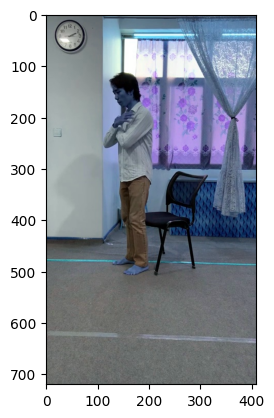

In [33]:

img_path = r"E:\CloudSource\CloudSource_share\open_pose\dataset (created)\12-12-2022 (abend)\720, jpg\chair-stand-test\sit_stand_classification\side (45 degree)\1-stand\DS_006_002_003_157_000100.jpg"
img = cv2.imread(img_path)
print(img.shape)
plt.imshow(img)

In [34]:
contents = "ok gg test image"

In [35]:
start_time = time.time()
upload_blob_from_memory(bucket_name, contents, destination_blob_name)
print("Time : ",time.time()-start_time )

test with contents ok gg test image uploaded to sk-t_test.
Time :  1.8385028839111328


In [37]:
bucket_name = "sk-t_test"
source_blob_name = "test"
destination_file_name = "test_result.txt"

start_time = time.time()
test_data = download_blob(bucket_name, source_blob_name, destination_file_name)
print("Time : ",time.time()-start_time )

Downloaded storage object test from bucket sk-t_test to local file test_result.txt.
Time :  1.7775380611419678


In [45]:
def upload_blob_from_file(bucket_name,file_name , destination_blob_name):
    file_path = file_name
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)
    blob.upload_from_filename(file_path)

In [51]:

bucket_name = "sk-t_test"
file_name = "DS_006_001_003_118.mp4"
destination_blob_name = "test/"+file_name

In [53]:
start_time = time.time()
upload_blob_from_file(bucket_name,file_name , destination_blob_name)
print("Time : ",time.time()-start_time )

Time :  4.812389612197876


In [55]:
start_time = time.time()
destination_file_name = "test.mp4"
test_data = download_blob(bucket_name, destination_blob_name, destination_file_name)
print("Time : ",time.time()-start_time )

Downloaded storage object test/DS_006_001_003_118.mp4 from bucket sk-t_test to local file test.mp4.
Time :  4.939898252487183
